In [154]:
import pandas as pd
import numpy as np
from functools import partial
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd





#Cargas de CSV
dataframeAtletas = pd.read_csv("Olympic_Athlete.csv")
juegosOlimpicos = pd.read_csv("Olympic_Athlete_Event_Results.csv")



#Funcion para convertir a entero o que devuelva NA (1 para entero  2 para float)
def convertirNumero(valor , numero:int):
    try:
        if numero ==1:
            numero = int(valor)
        elif numero == 2:
            numero = float(valor)      
        return numero    
    except ValueError:
        return pd.NA

#Confuncion para devolver NA

def convertirNA(valor):
    if valor == "na":
        return pd.NA
    else:
        return valor
              


#establecer  elsegundo  parametro 
convertirFloat = partial(convertirNumero, numero=2)

#mapeo utiliza la funcion convertirFloat
columna = list( map ( convertirFloat, dataframeAtletas["height"] ))
#mapeo utiliza la funcion convertirFloat
columnaWeight = list( map ( convertirFloat, dataframeAtletas["weight"] ))
#mapeo para devolver NA 
columnaMedalla = list(map(convertirNA, juegosOlimpicos["medal"]))

#reemplazo de nuevas columnas
juegosOlimpicos["medal"] = columnaMedalla
dataframeAtletas["height"] = columna    
dataframeAtletas["weight"] = columnaWeight     

#suma los datos con na 
dataframeAtletas.iloc[[0]]  # sacar x fila
dataframeAtletas.iloc[1:10]  # sacar rangos de filas
dataframeAtletas["height"].mean()
dataframeAtletas.shape
juegosOlimpicos["medal"].value_counts() #conteo de elemntos por distinción

#eliminar columnas born, description,description
columnasEliminarAtletas = ["description", "special_notes" ]
dataframeAtletas = dataframeAtletas.drop(columnasEliminarAtletas, axis=1)


columnasEliminarJuegos = ["description", "special_notes"]
juegosOlimpicos = juegosOlimpicos.drop("isTeamSport",axis=1)


#left join  entre 2 tablas del evento olimpico y el atleta "
tablaJuegosOlimpicos = pd.merge(juegosOlimpicos, dataframeAtletas, on="athlete_id", how="left")
tablaJuegosOlimpicos.groupby("edition").count().sort_values(by="edition_id", ascending=False)
MXJuegoOlimpicos = tablaJuegosOlimpicos.loc[tablaJuegosOlimpicos["country_noc_x"]== "MEX" ]
#filtro x sexo
MxMujeres = MXJuegoOlimpicos[MXJuegoOlimpicos['sex'] =="Female"]
MxHombres = MXJuegoOlimpicos[MXJuegoOlimpicos['sex'] =="Male"]
#agrupar por año
grupoMujeres = MxMujeres.groupby("edition")["sport"].count()
grupoHombres = MxHombres.groupby("edition")["sport"].count()

#union de tablas outer
participacionesXSexo = pd.merge(grupoMujeres, grupoHombres, on="edition", how="outer").reset_index()

#renombrar columnas
participacionesXSexo.rename(columns={
    "sport_x":"Mujeres",
    "sport_y":"Hombres"   
}, inplace=True)

#extraer palabra y crear columna de tipo entero
participacionesXSexo["año"]= participacionesXSexo["edition"].str.split().str.get(0).astype(int)
#rellenar los Na con 0
participacionesXSexo.fillna(0, inplace=True)
#suma de columnas
participacionesXSexo["participaciones_totales"] =  participacionesXSexo["Hombres"] + participacionesXSexo["Mujeres"]
#pasar a enterno
participacionesXSexo["participaciones_totales"].astype(int)
#ordenar por año
participacionesXSexo.sort_values(by="año",ascending=True)
#Filtro solo los juegos de Verano
participacionesXSexo = participacionesXSexo.loc[participacionesXSexo["edition"].str.contains("Summer")]
participacionesXSexo.sort_values(by="participaciones_totales",ascending=False).reset_index()


,index,edition,Mujeres,Hombres,año,participaciones_totales
0,6,1968 Summer Olympics,125.0,387,1968,512.0
1,7,1972 Summer Olympics,72.0,220,1972,292.0
2,22,2020 Summer Olympics,85.0,109,2020,194.0
3,13,1992 Summer Olympics,43.0,129,1992,172.0
4,1,1948 Summer Olympics,9.0,161,1948,170.0
5,10,1984 Summer Olympics,42.0,116,1984,158.0
6,17,2004 Summer Olympics,72.0,78,2004,150.0
7,11,1988 Summer Olympics,31.0,119,1988,150.0
8,20,2016 Summer Olympics,56.0,86,2016,142.0
9,8,1976 Summer Olympics,15.0,125,1976,140.0


In [155]:


MXJuegoOlimpicos

,edition,edition_id,country_noc_x,sport,event,result_id,athlete,athlete_id,pos,medal,name,sex,born,height,weight,country,country_noc_y
123112,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,Eustaquio Escandón,17811,=3,Bronze,Eustaquio Escandón,Male,1862-01-25,NaN,NaN,Mexico,MEX
123113,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,Manuel Escandón,17810,=3,Bronze,Manuel Escandón,Male,1857-08-13,NaN,NaN,Mexico,MEX
123114,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,Pablo Escandón,17812,=3,Bronze,Pablo Escandón,Male,1856-05-04,NaN,NaN,Mexico,MEX
123115,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,William Wright,17818,=3,Bronze,William Wright,Male,na,NaN,NaN,United States,USA
123116,1924 Summer Olympics,8,MEX,Athletics,"100 metres, Men",57285,Mariano Aguilar,73453,4 h1 r1/4,<NA>,Mariano Aguilar,Male,1903-10-23,NaN,NaN,Mexico,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126468,2022 Winter Olympics,62,MEX,Alpine Skiing,"Giant Slalom, Men",19019502,Rodolfo Dickson,137677,35,NaN,Rodolfo Dickson,Male,1997-07-11,170.0,67.0,Mexico,MEX
126469,2022 Winter Olympics,62,MEX,Alpine Skiing,"Super G, Women",19019512,Sarah Schleper,99452,35,NaN,Sarah Schleper,Female,1979-02-19,162.0,61.0,Mexico United States,MEX
126470,2022 Winter Olympics,62,MEX,Alpine Skiing,"Giant Slalom, Women",19019513,Sarah Schleper,99452,37,NaN,Sarah Schleper,Female,1979-02-19,162.0,61.0,Mexico United States,MEX
126471,2022 Winter Olympics,62,MEX,Cross Country Skiing,"15 kilometres, Men",19019712,Jonathan Soto,148655,94,NaN,Jonathan Soto,Male,1993-05-01,<NA>,<NA>,Mexico,MEX


In [156]:

resultados = pd.read_csv("Olympic_Results.csv")
#seleccion de columans del archivo csv
resultados = pd.DataFrame(resultados[["result_id", "sport","event_title","result_description"]])
#filtro que tengas medallas y año 
MXJuegoOlimpicos2020 = MXJuegoOlimpicos[(~MXJuegoOlimpicos["medal"].isna()) & (MXJuegoOlimpicos["año"]==2016) ].reset_index()
#"agrupar por evento"
MXJuegoOlimpicos2020 =MXJuegoOlimpicos2020[["result_id","medal"]].groupby(["result_id","medal"]).nunique()
#se genera el merge con la descripcion del evento
medallasMx2020 = pd.merge(MXJuegoOlimpicos2020, resultados, on="result_id",how ="left")
medallasMx2020


KeyError: 'año'

In [ ]:
#agrupación
medallasTotales = MedallasMexico[["año","result_id","medal"]].groupby(["año","result_id","medal"]).sum().reset_index()
#doy valor a la medalla para que me lo sume"
medallasTotales["cantidad"] = 1 
#filtar y ordenar
filtro= medallasTotales[medallasTotales["año"]==2016].sort_values(by = "medal")

filtro.groupby("medal").sum().reset_index().drop(columns=["año"])



,medal,result_id,cantidad
0,Bronze,708372,2
1,Silver,1064376,3


In [ ]:
#mosrar el historico de medallas

medalleroMX = MedallasMexico.groupby(["año","result_id"]).count().reset_index()
#doy parar a las medallas
medalleroMX["cantidad"]= 1
medalleroMX =medalleroMX[["año", "cantidad"]]
medalleroMX.groupby("año").sum()



,cantidad
año,
1900,1
1932,2
1936,3
1948,4
1952,1
1956,2
1960,1
1964,1
1968,9


In [ ]:
#mostrar x año las copetencias que llegarona cuarto lugar


#filtrar  por el posicion 4
posicion4= MXJuegoOlimpicos[MXJuegoOlimpicos["pos"]=="4"].reset_index()
#seleccion de columnas
deportesPosicion4= posicion4[["año","result_id"]]
dfDesportesAgrupado = deportesPosicion4.groupby(["año", "result_id"]).nunique().reset_index()

dfDesportesAgrupado.groupby("año").count()


,result_id
año,
1932,1
1948,2
1952,1
1960,2
1964,1
1968,9
1972,1
1980,1
1992,1


In [ ]:

#posicion 5
posicion5= MXJuegoOlimpicos[MXJuegoOlimpicos["pos"]=="5"].reset_index()
deportesPosicion5= posicion5[["sport","result_id"]]
deportesPosicion5.groupby("sport").nunique().sort_values(by="result_id",ascending=False).reset_index()

,sport,result_id
0,Diving,10
1,Athletics,7
2,Archery,2
3,Modern Pentathlon,2
4,Tennis,2
5,Weightlifting,2
6,Artistic Gymnastics,1
7,Basketball,1
8,Cycling Track,1
9,Shooting,1


In [ ]:
#posicion 4"
deportesPosicion4= posicion4[["sport","result_id"]]


datosInsertar = deportesPosicion4.groupby("sport").nunique().sort_values(by="result_id",ascending=False).reset_index()


datosInsertar

,sport,result_id
0,Diving,13
1,Tennis,4
2,Archery,3
3,Athletics,3
4,Artistic Gymnastics,2
5,Shooting,2
6,Basketball,1
7,Basque pelota,1
8,Canoe Sprint,1
9,Football,1


In [ ]:
#pandas cut

MXJuegoOlimpicosNA = MXJuegoOlimpicos.dropna(subset=["height"])
df =pd.cut(MXJuegoOlimpicosNA["height"], 10
       ).reset_index()

df.groupby("height").count().reset_index()



,height,index
0,"(126.923, 134.7]",6
1,"(134.7, 142.4]",0
2,"(142.4, 150.1]",31
3,"(150.1, 157.8]",149
4,"(157.8, 165.5]",437
5,"(165.5, 173.2]",798
6,"(173.2, 180.9]",636
7,"(180.9, 188.6]",320
8,"(188.6, 196.3]",73
9,"(196.3, 204.0]",19


C:\Users\TEST\AppData\Local\Temp\ipykernel_11368\2776216565.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MXJuegoOlimpicosNA["height"], kde=True, norm_hist=True, bins=10) #bins numeros de columnas   kde grafica


<Axes: xlabel='height', ylabel='Density'>

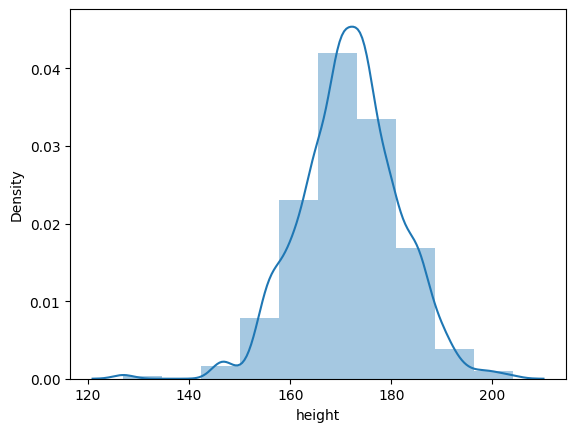

In [ ]:
#pandas cut

MXJuegoOlimpicosNA = MXJuegoOlimpicos.dropna(subset=["height"])

MXJuegoOlimpicosNA


sns.distplot(MXJuegoOlimpicosNA["height"], kde=True, norm_hist=True, bins=10) #bins numeros de columnas   kde grafica



C:\Users\TEST\AppData\Local\Temp\ipykernel_3704\3192603982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MXJuegoOlimpicosNA["height"], hist=False, norm_hist=True, bins=10) #bins numeros de columnas   kde grafica


<Axes: xlabel='height', ylabel='Density'>

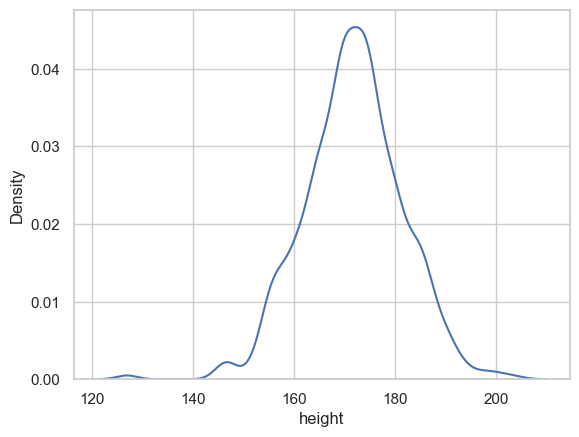

In [ ]:

sns.distplot(MXJuegoOlimpicosNA["height"], hist=False, norm_hist=True, bins=10) #bins numeros de columnas   hits la linea de densisdad true con barras


C:\Users\TEST\AppData\Local\Temp\ipykernel_11368\2242252494.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal, kde=False, norm_hist=False);


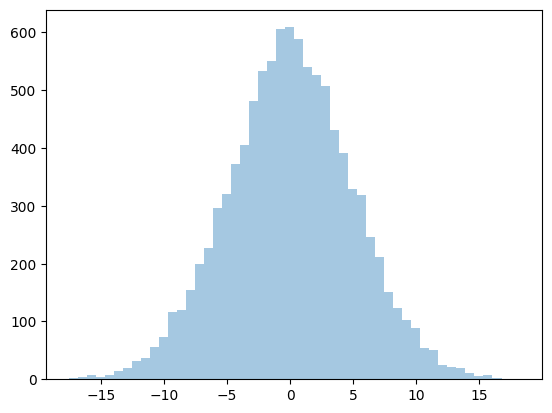

In [ ]:
# cola   es la parte final , si la cola de la izq es negativoa
#curtosis es que tan achatada , si es possiitiva es escarpada


from scipy.stats import skew, kurtosis






C:\Users\TEST\AppData\Local\Temp\ipykernel_11368\70072538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(MXJuegoOlimpicosNA["height"], kde=False, norm_hist=True, bins=10)


[Text(0.5, 1.0, 'Alturas de atletas que participaron en los Juegos Olímpicos MX'),
 Text(0.5, 0, 'Alturas'),
 Text(0, 0.5, 'Porcentaje')]

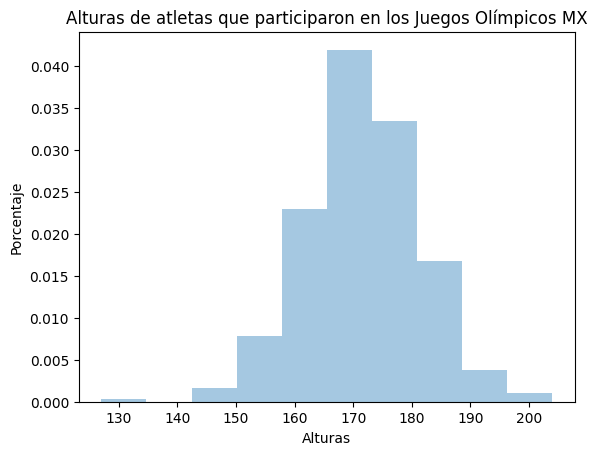

In [ ]:


ax = sns.distplot(MXJuegoOlimpicosNA["height"], kde=False, norm_hist=True, bins=10)
ax.set(title='Alturas de atletas que participaron en los Juegos Olímpicos MX', xlabel='Alturas', ylabel='Porcentaje')



C:\Users\TEST\AppData\Local\Temp\ipykernel_11368\2024243728.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
C:\Users\TEST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\TEST\AppData\Local\Temp\ipykernel_11368\2024243728.py:13

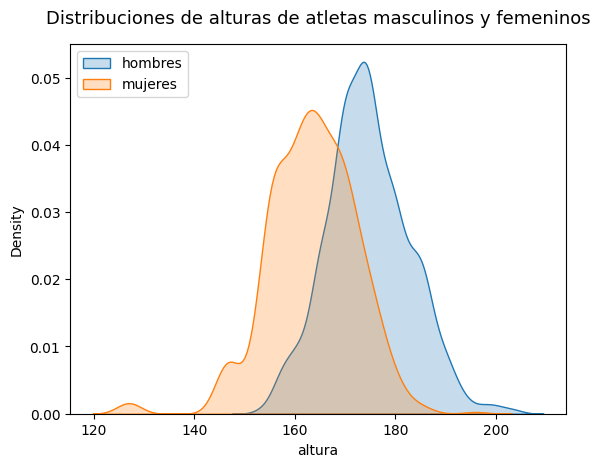

In [ ]:

by_athlete = MXJuegoOlimpicosNA.groupby(level=0)[['height', 'weight']].mean()

sex = MXJuegoOlimpicosNA.groupby(level=0)['sex'].last()

merged = by_athlete.merge(sex, left_index=True, right_index=True)

males = by_athlete[merged['sex'] == 'Male']
females = by_athlete[merged['sex'] == 'Female']



ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);#titulo
ax.set(xlabel='altura');#nombrar leyenda x
ax.legend(loc='upper left'); #posicion del recuadro



C:\Users\TEST\AppData\Local\Temp\ipykernel_11368\1447276331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(MXJuegoOlimpicosNA['height'], kde=False, norm_hist=False)


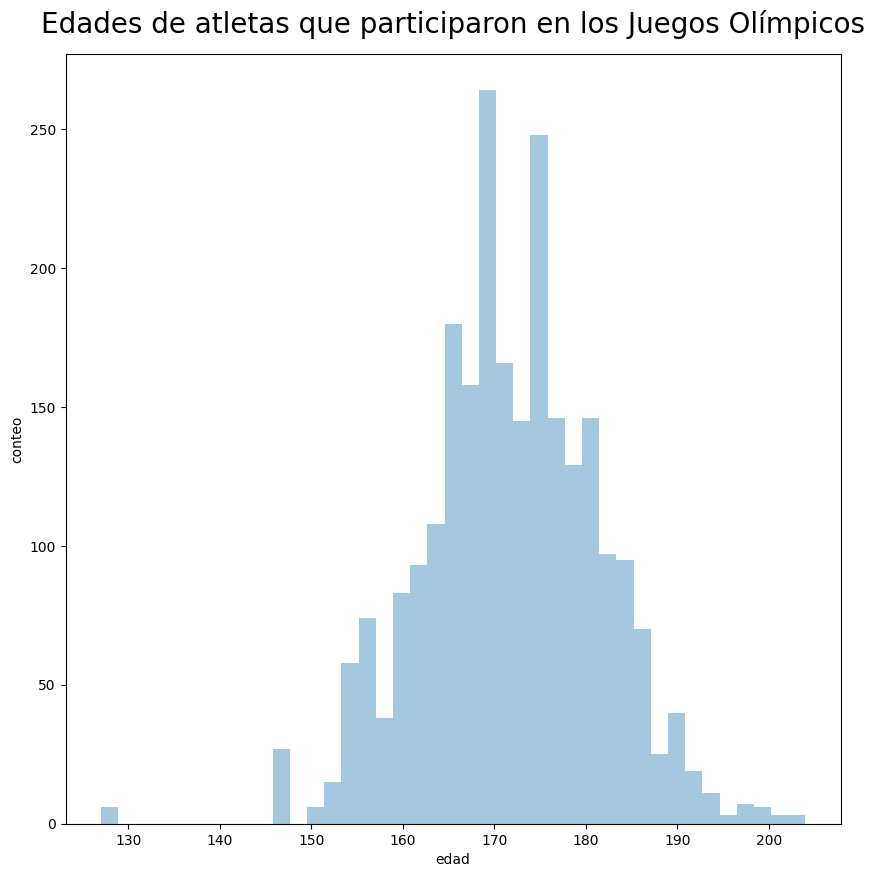

In [ ]:


fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(MXJuegoOlimpicosNA['height'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');



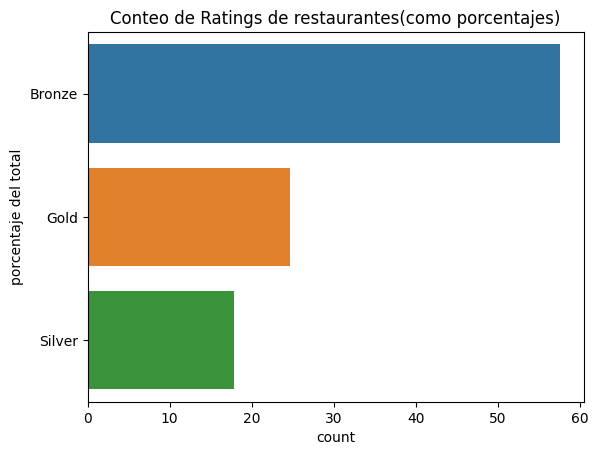

In [ ]:


MXJuegoOlimpicos['medal'].unique()

porSexo = MXJuegoOlimpicos['medal'].value_counts()

porcentaje = porSexo * 100 / porSexo.sum()  # por porcentaje

df =  pd.DataFrame( porcentaje).reset_index()
ax = sns.barplot(x=df["count"], y=df["medal"], data=df, orient='h') #clasificacion
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');


In [158]:
#filas  y columnas
pd.crosstab(MXJuegoOlimpicosNA['sport'], MXJuegoOlimpicosNA['medal'], margins=True, margins_name='TOTALES').sort_values(by=["Gold","Silver", "Bronze"], ascending=False) # tabla con conteo



medal,Bronze,Gold,Silver,TOTALES
sport,,,,
TOTALES,39,31,22,92
Football,3,22,0,25
Athletics,2,3,6,11
Boxing,7,2,2,11
Taekwondo,3,2,2,7
Weightlifting,3,1,0,4
Swimming,1,1,0,2
Diving,6,0,8,14
Archery,3,0,1,4


pd.crosstab(MXJuegoOlimpicosNA['sport'], [MXJuegoOlimpicosNA['medal'], MXJuegoOlimpicosNA['sex']], margins=True, margins_name='TOTALES')


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

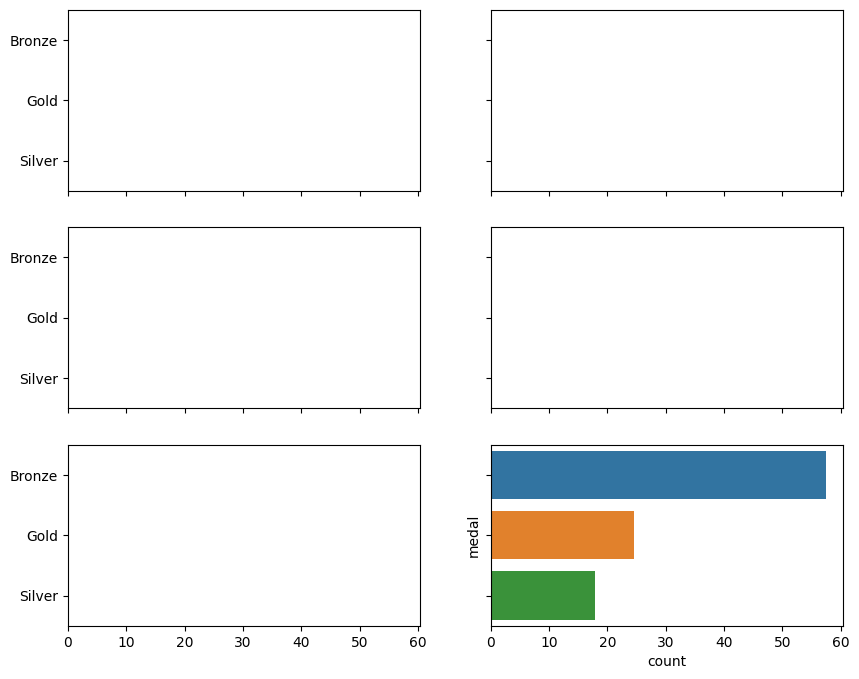

In [193]:
cross = pd.crosstab(MXJuegoOlimpicosNA['medal'], MXJuegoOlimpicosNA['sex']).reset_index()



fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)

ax = sns.barplot(x=df["count"], y=df["medal"], data=df, orient='h') #clasificacion


sns.barplot(cross.columns, cross.loc[1], ax=axes[1, 0])
